# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [8]:
# import requests

# url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite"
# response = requests.get(url)

# # Ghi tệp vào đĩa
# with open("m4_survey_data.sqlite", "wb") as f:
#     f.write(response.content)

# # print("Tệp đã được tải xuống thành công!")

Connect to the database.


In [37]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [10]:
import pandas as pd

## Demo: How to run an sql query


In [11]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [44]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [ ]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

## Demo: How to describe a table


In [14]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


In [15]:
# your code goes here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
QUERY = """
SELECT *
FROM master
"""
df = pd.read_sql_query(QUERY,conn)

0    Developer, full-stack
Name: DevType, dtype: object

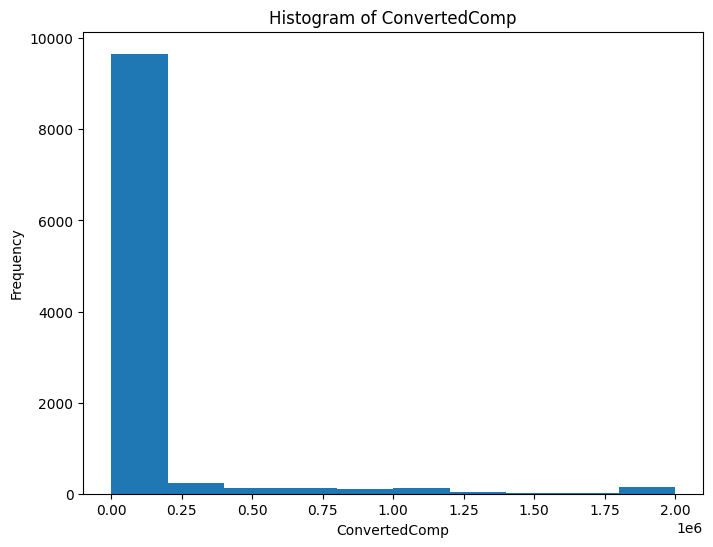

In [17]:
plt.figure(figsize=(8, 6))
df['ConvertedComp'].plot(kind='hist', figsize=(8, 6))
plt.title('Histogram of ConvertedComp')
plt.xlabel('ConvertedComp')
plt.show()

### Box Plots


Plot a box plot of `Age.`


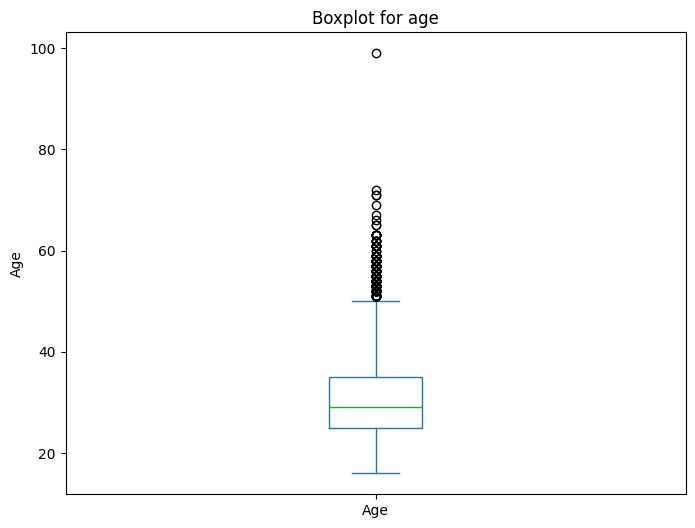

In [18]:
# your code goes here

plt.figure(figsize=(8, 6))
df['Age'].plot(kind='box', figsize=(8, 6))
plt.title('Boxplot for age')
plt.ylabel('Age')
plt.show()

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


<Figure size 800x600 with 0 Axes>

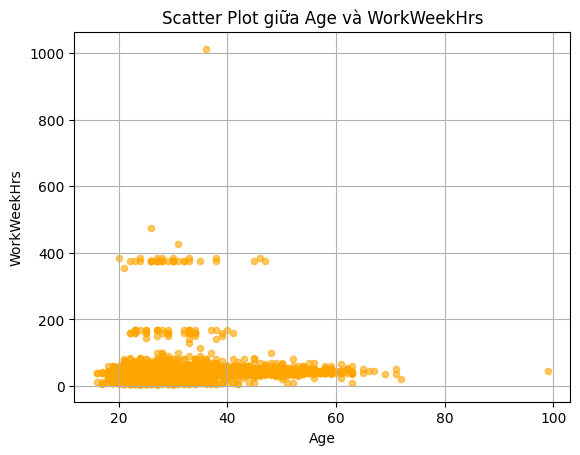

In [19]:
# your code goes here
# Vẽ scatter plot sử dụng hàm plot()
plt.figure(figsize=(8, 6))
df.plot(kind='scatter', x='Age', y='WorkWeekHrs', alpha=0.6, color='orange')
plt.title('Scatter Plot giữa Age và WorkWeekHrs')
plt.xlabel('Age')
plt.ylabel('WorkWeekHrs')
plt.grid(True)
plt.show()


### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


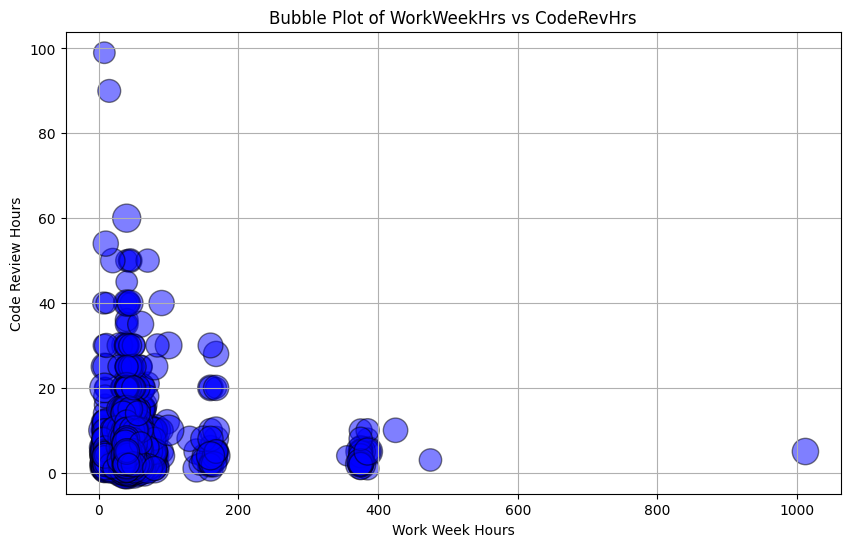

In [20]:
# your code goes here
plt.figure(figsize=(10, 6))
plt.scatter(df['WorkWeekHrs'], df['CodeRevHrs'], 
            s=df['Age'] * 10,  # Scale bubble size
            alpha=0.5, 
            color='blue', 
            edgecolor='black')

plt.title('Bubble Plot of WorkWeekHrs vs CodeRevHrs')
plt.xlabel('Work Week Hours')
plt.ylabel('Code Review Hours')
plt.grid(True)
plt.show()


## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


In [47]:
# your code goes here
QUERY = """
SELECT COUNT(*) AS RespondentCount
FROM DatabaseWorkedWith
WHERE DatabaseWorkedWith = 'MySQL'
AND Respondent NOT IN (
    SELECT Respondent
    FROM DatabaseWorkedWith
    WHERE DatabaseWorkedWith <> 'MySQL'
);
"""
df_db = pd.read_sql_query(QUERY,conn)

df_db.head()

# top_databases = pd.read_sql_query(QUERY,conn)


,RespondentCount
0,474


In [41]:
# your code goes here
QUERY = """
SELECT DatabaseDesireNextYear as Database,COUNT(*) as Counts
FROM DatabaseDesireNextYear
group by DatabaseDesireNextYear
order by Counts DESC LIMIT 5
"""
df_db = pd.read_sql_query(QUERY,conn)

df_db.head()

# top_databases = pd.read_sql_query(QUERY,conn)


,Database,Counts
0,PostgreSQL,4328
1,MongoDB,3649
2,Redis,3331
3,MySQL,3281
4,Elasticsearch,2856


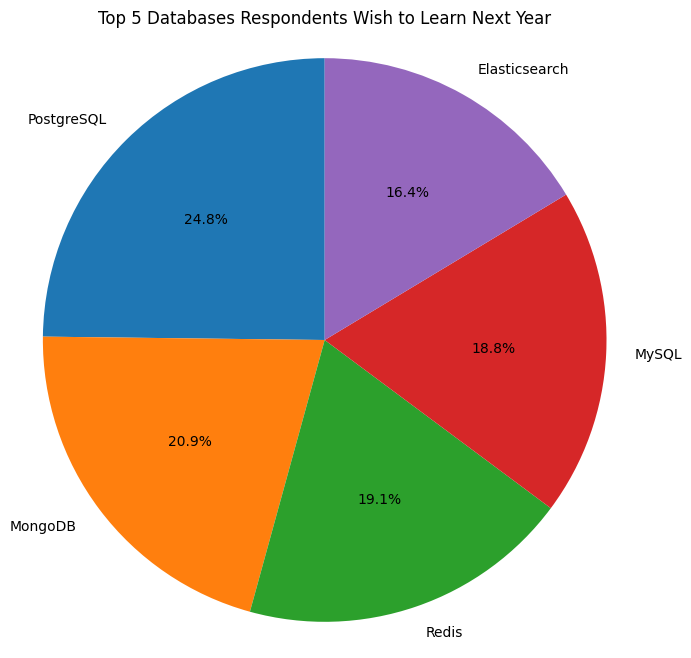

In [26]:
# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_databases['Counts'], 
        labels=top_databases['Database'], 
        autopct='%1.1f%%', 
        startangle=90)
plt.title('Top 5 Databases Respondents Wish to Learn Next Year')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


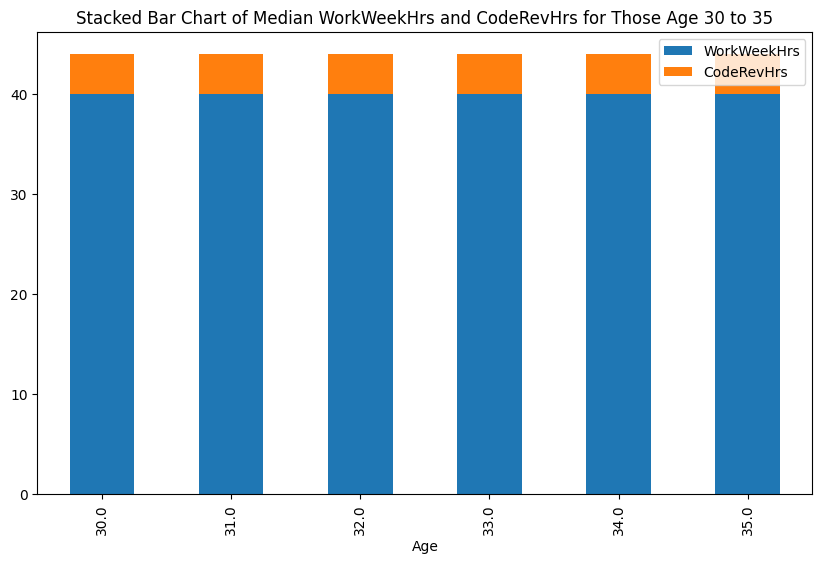

In [31]:
QUERY = """
SELECT WorkWeekHrs, CodeRevHrs, Age FROM master
WHERE Age BETWEEN 30 AND 35
"""
df_age = pd.read_sql_query(QUERY,conn)
df_stack = df_age.groupby('Age').median()

df_stack.plot(kind='bar', figsize=(10, 6), stacked=True)

plt.title('Stacked Bar Chart of Median WorkWeekHrs and CodeRevHrs for Those Age 30 to 35')
plt.show()

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


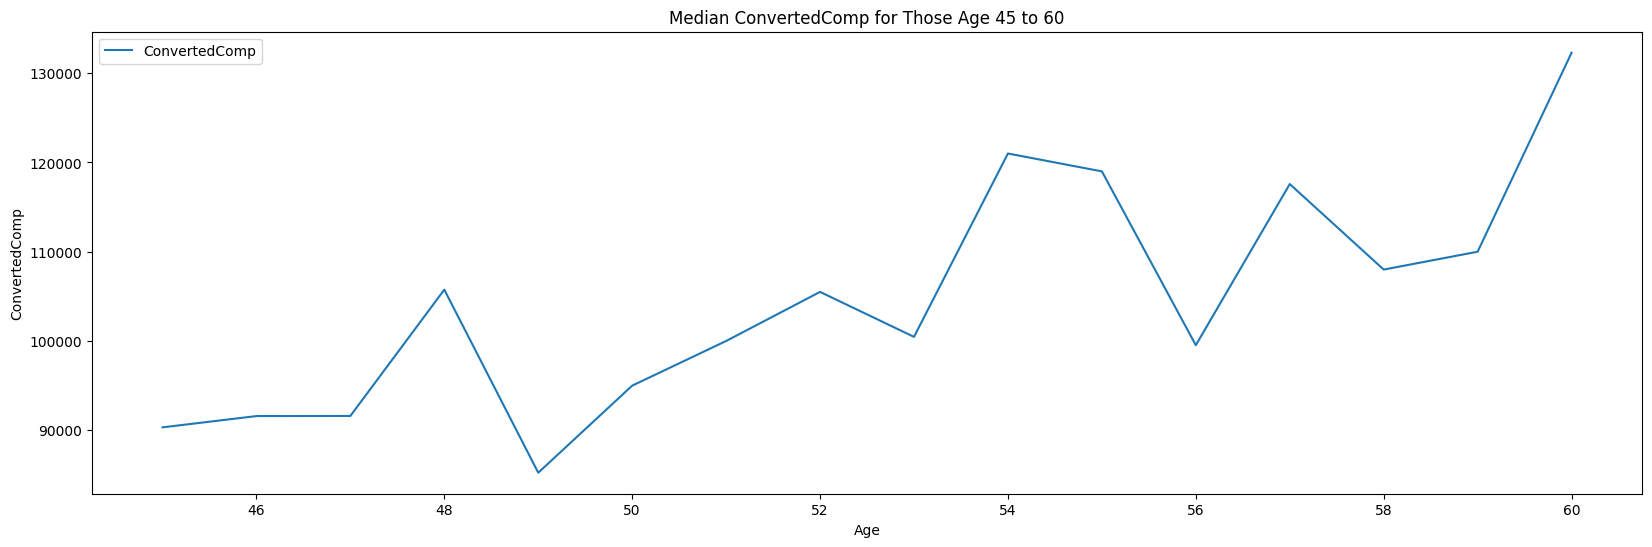

In [32]:
# your code goes here

QUERY = """
SELECT ConvertedComp, Age FROM master
WHERE Age BETWEEN 45 AND 60
"""
df = pd.read_sql_query(QUERY,conn)
df1 = df.groupby('Age').median()

df1.plot(kind='line', figsize=(20, 6))

plt.title('Median ConvertedComp for Those Age 45 to 60')
plt.ylabel('ConvertedComp')
plt.show()

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


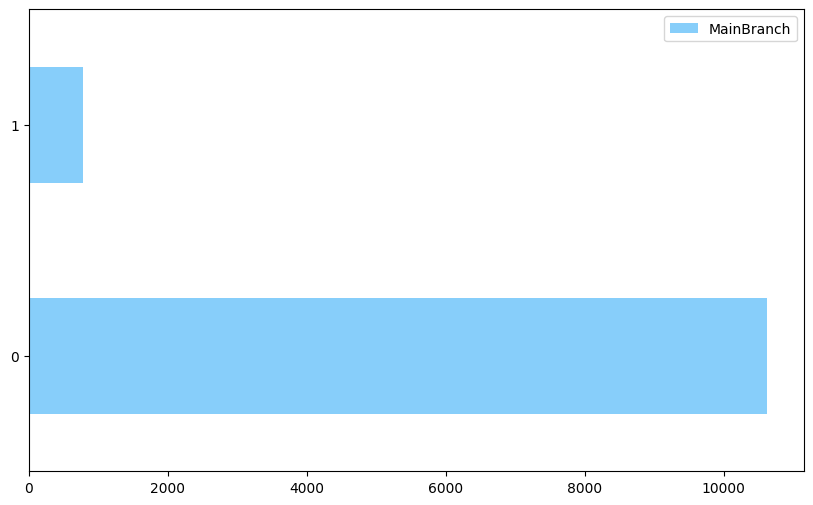

In [33]:
# your code goes here

QUERY = """
SELECT MainBranch, COUNT(*) as MainBranch
from master
group by MainBranch
"""

df=pd.read_sql_query(QUERY,conn)

df.plot(kind='barh', figsize=(10,6), color='lightskyblue')

plt.show()

Close the database connection.


In [34]:
conn.close()